In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
spotify_df = pd.read_csv('/work/spotify-2023_utf8.csv')
spotify_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
missing_values = spotify_df.isnull().sum()
print(missing_values)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [ ]:
spotify_df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [ ]:
spotify_df['in_deezer_playlists'] 

0       45
1       58
2       91
3      125
4       87
      ... 
948     37
949      8
950      7
951     17
952     32
Name: in_deezer_playlists, Length: 953, dtype: object

In [ ]:
spotify_df = spotify_df.drop(574).reset_index(drop=True)

In [ ]:
# Imputing missing values
#shazam_chart

#replacing commas in shazam charts
spotify_df['in_shazam_charts'] = spotify_df['in_shazam_charts'].replace({',': ''}, regex=True).astype(float)

spotify_df['in_shazam_charts_ML'] = spotify_df['in_shazam_charts'].copy()
#creating a max rank
highest_rank = spotify_df['in_shazam_charts_ML'].max()
spotify_df['in_shazam_charts_ML'].fillna(highest_rank + 1, inplace=True)
spotify_df['in_shazam_charts_ML'] = spotify_df['in_shazam_charts_ML'].astype(int)


# Creating a ranked column based on streams
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce')

In [ ]:
#removing nan key values since it is not something we can predict using mean or mode

spotify_df = spotify_df.dropna(subset=['key'])

# Verify if the rows with missing values have been removed
print(spotify_df['key'].isnull().sum())

0


In [ ]:
#converting deezer_playlists into numeric 

spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'], errors='coerce')
spotify_df['in_deezer_playlists'].fillna(0, inplace=True)
print("Revised Data Types:")
print(spotify_df.dtypes)

Revised Data Types:
track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                   int64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
in_shazam_charts_ML       int64
dtype: object


In [ ]:
#checking whether there are any missing values in these two columns
print(spotify_df['streams'].isna().sum())
print(spotify_df['in_deezer_playlists'].isna().sum())

0
0


In [ ]:
# One-Hot Encoding for 'mode' while keeping the original 'mode' column untouched
# Creating a DataFrame of one-hot encoded values
mode_encoded = pd.get_dummies(spotify_df['mode'], prefix='mode')

# Concatenating the one-hot encoded DataFrame to the original DataFrame
spotify_df = pd.concat([spotify_df, mode_encoded], axis=1)

# Manual Label Encoding for 'key' while keeping the original 'key' column untouched
# Create a mapping from unique string values to integers
key_mapping = {key: idx for idx, key in enumerate(spotify_df['key'].unique())}

# Creating a new column for encoded 'key' values using the mapping
spotify_df['key_encoded'] = spotify_df['key'].map(key_mapping)

# Print updated DataFrame with new encoded columns alongside original 'mode' and 'key'
print("\nUpdated Data with Encoded Categorical Variables:")
print(spotify_df[['mode', *mode_encoded.columns, 'key', 'key_encoded']].head())


Updated Data with Encoded Categorical Variables:
    mode  mode_Major  mode_Minor key  key_encoded
0  Major           1           0   B            0
1  Major           1           0  C#            1
2  Major           1           0   F            2
3  Major           1           0   A            3
4  Minor           0           1   A            3


In [ ]:
def histogramPlot(series):
    # Create a figure for the histogram
    plt.figure(figsize=(8, 6))

    # Histogram
    sns.histplot(x=series)
    plt.title('Histogram of ' + series.name)

    plt.show()

In [ ]:
spotify_df_numeric = spotify_df.select_dtypes(include=np.number)
spotify_df_numeric

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_shazam_charts_ML,mode_Major,mode_Minor,key_encoded
0,2,2023,7,14,553,147,141381703,43,263,45.0,...,89,83,31,0,8,4,826,1,0,0
1,1,2023,3,23,1474,48,133716286,48,126,58.0,...,61,74,7,0,10,4,382,1,0,1
2,1,2023,6,30,1397,113,140003974,94,207,91.0,...,32,53,17,0,31,6,949,1,0,2
3,1,2019,8,23,7858,100,800840817,116,207,125.0,...,58,72,11,0,11,15,548,1,0,3
4,1,2023,5,18,3133,50,303236322,84,133,87.0,...,23,80,14,63,11,6,425,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,1,2022,11,3,953,0,91473363,61,13,37.0,...,24,39,57,0,8,3,0,1,0,3
948,1,2022,10,21,1180,0,121871870,4,0,8.0,...,7,24,83,1,12,6,0,1,0,5
949,2,2022,11,3,573,0,73513683,2,0,7.0,...,81,67,4,0,8,6,0,1,0,1
950,3,2022,10,20,1320,0,133895612,29,26,17.0,...,67,77,8,0,12,5,0,1,0,1


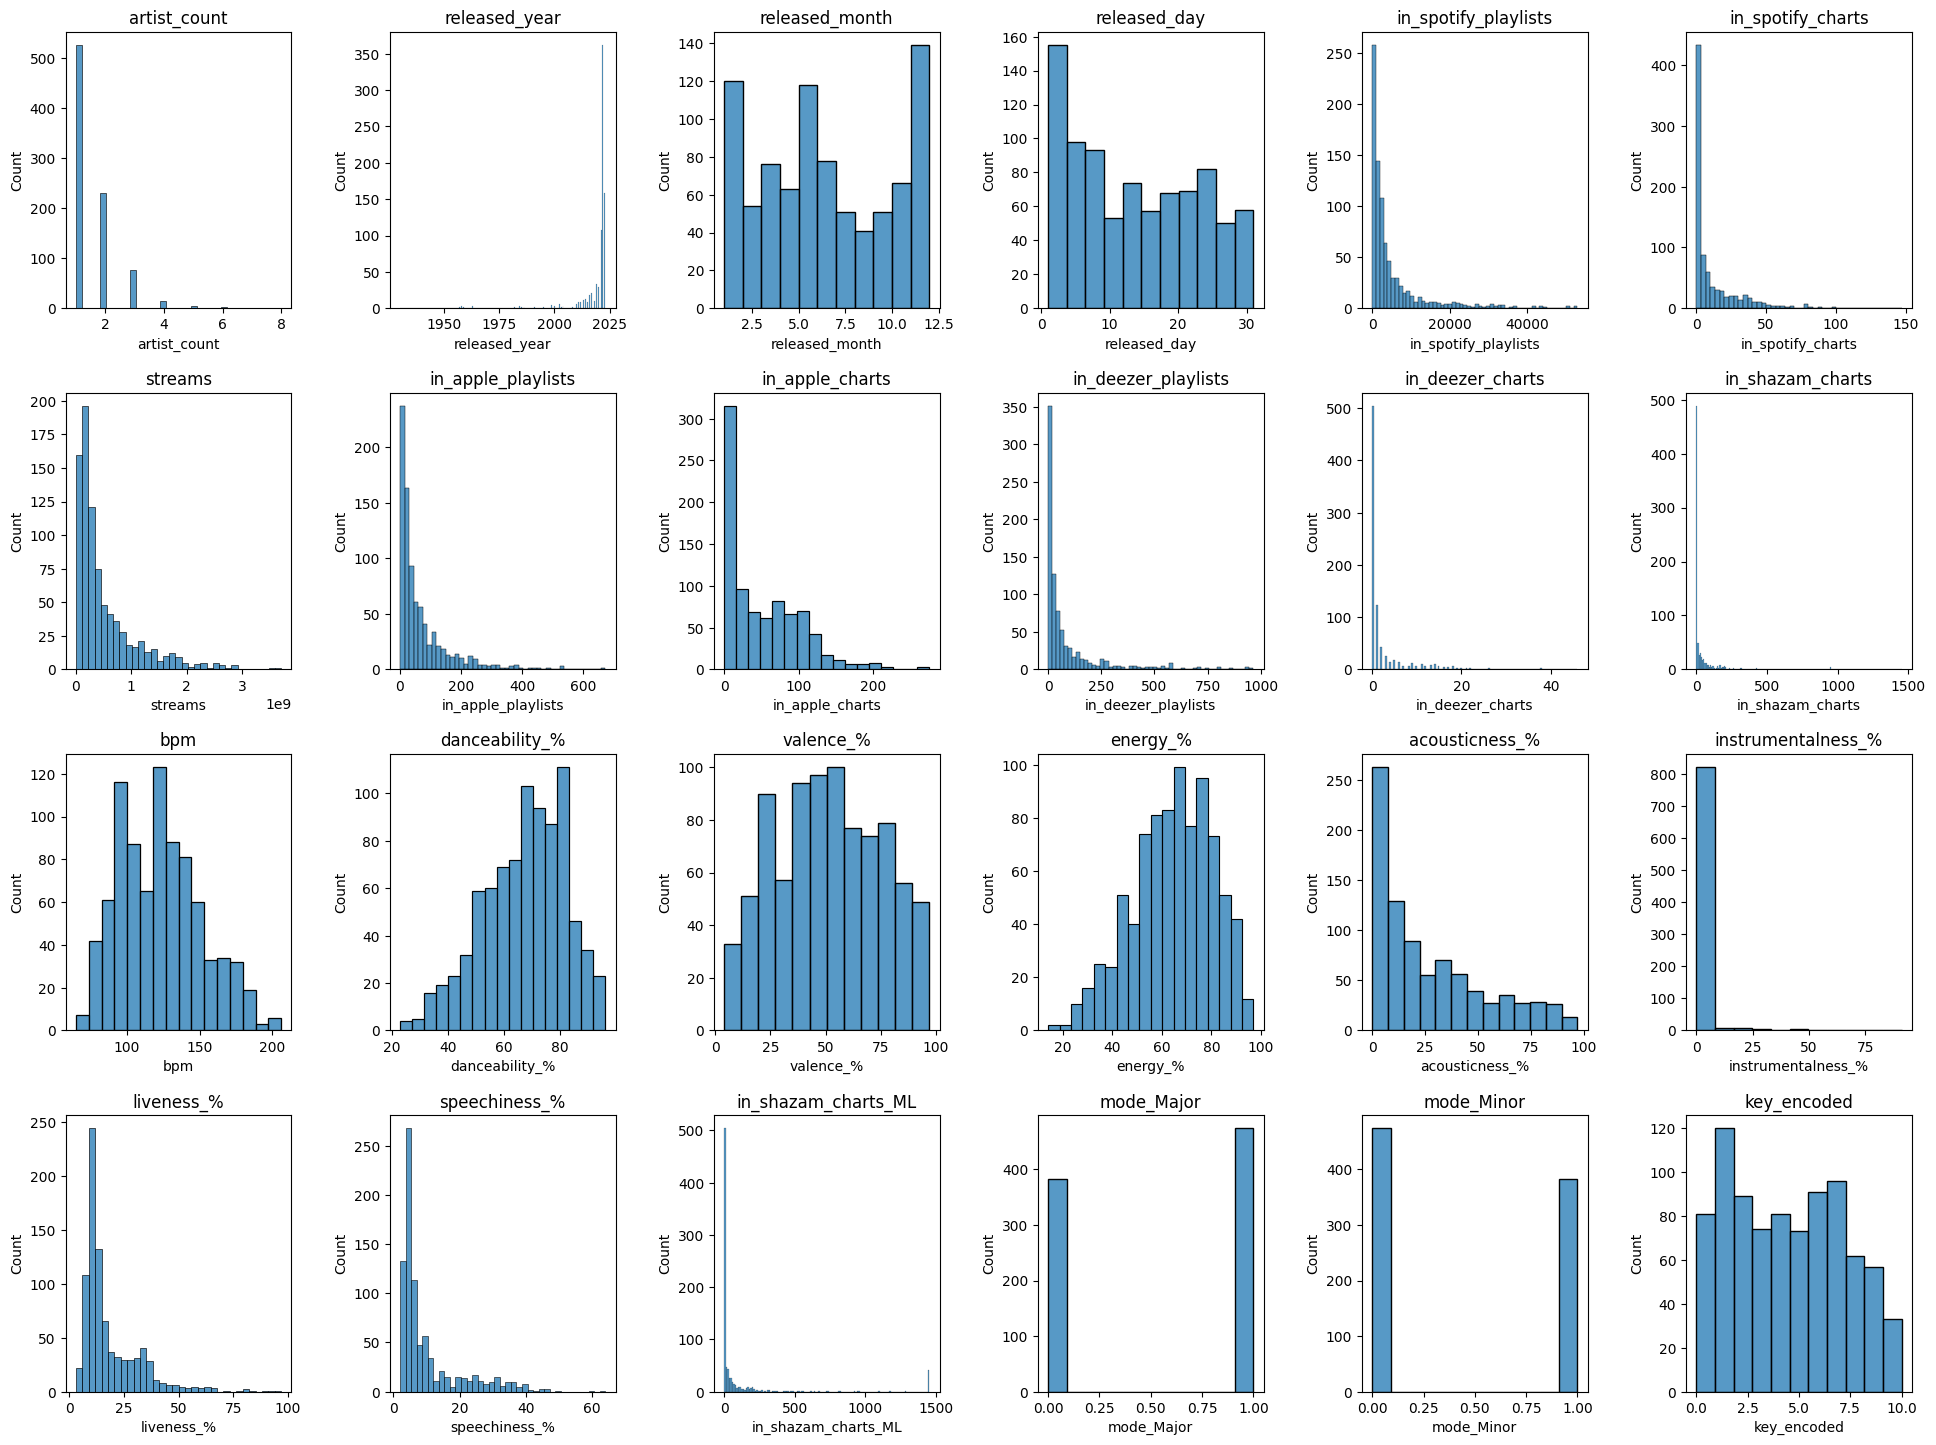

In [ ]:
n_rows = 4
n_cols = 6

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 15)) # Adjust the size as needed
fig.tight_layout(pad=4.0)

# Iterate over the numeric columns and create a histogram in each subplot
for i, column in enumerate(spotify_df_numeric.columns):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(spotify_df_numeric[column], ax=axs[row, col])
    axs[row, col].set_title(column)

# If the total number of plots is not a multiple of rows*cols, hide the empty subplots
for i in range(len(spotify_df_numeric.columns), n_rows*n_cols):
    axs[i // n_cols, i % n_cols].axis('off')

plt.show()

In [ ]:
summary_stats = spotify_df.describe()
print(summary_stats)

       artist_count  released_year  released_month  released_day  \
count    857.000000     857.000000      857.000000    857.000000   
mean       1.551925    2018.297550        6.031505     13.739790   
std        0.864634      10.991135        3.567138      9.287652   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      5.000000   
50%        1.000000    2022.000000        5.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            857.000000         857.000000  8.570000e+02   
mean            5204.997666          11.959160  5.133554e+08   
std             7944.032885          19.194211  5.714855e+08   
min               31.000000           0.000000  2.762000e+03   
25%              859.000000           0.000000  1.391938e+08   
50%

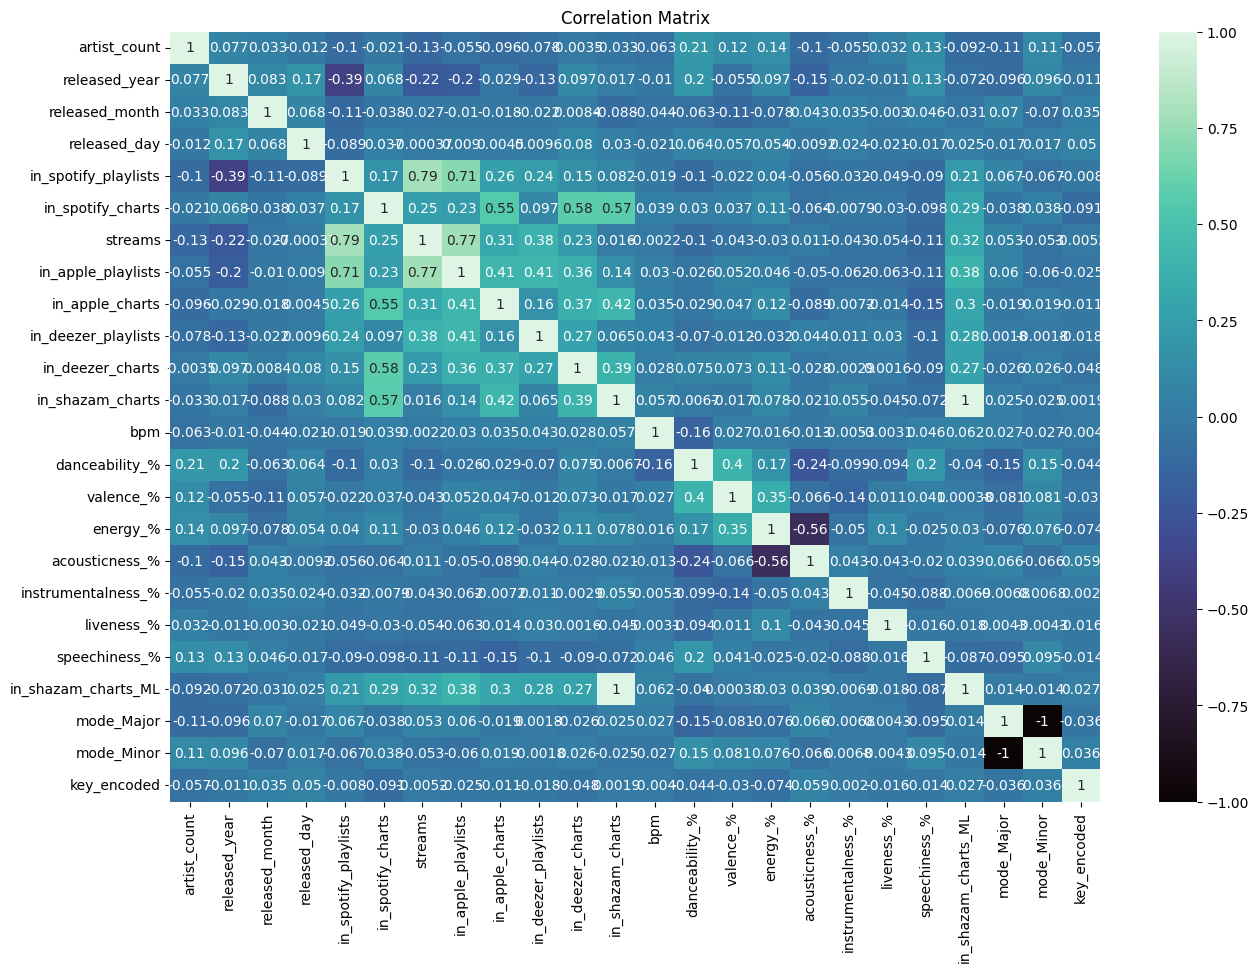

In [ ]:
#correlation matrix to guide feature selection
numeric_data = spotify_df.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='mako')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
spotify_df['popularity_rank'] = spotify_df['streams'].rank(ascending=True)
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_shazam_charts_ML,mode_Major,mode_Minor,key_encoded,popularity_rank
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,83,31,0,8,4,826,1,0,0,221.0
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,74,7,0,10,4,382,1,0,1,201.0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,53,17,0,31,6,949,1,0,2,218.0
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,72,11,0,11,15,548,1,0,3,681.0
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,80,14,63,11,6,425,0,1,3,450.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

features = [
    'artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 
    'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'key_encoded'
]
X = spotify_df[features]
y = spotify_df['streams']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressors = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
]

# Dictionary to hold the cross-validation scores
cv_scores = {}

for reg in regressors:
    # Since the dataset is quite large, we'll limit the cross-validation to 3 folds for time efficiency
    score = cross_val_score(reg, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error').mean()
    cv_scores[reg.__class__.__name__] = -score  # negate the score since cross_val_score returns negative mean squared error

cv_scores

{'LinearRegression': 9.03580735539204e+16,
 'DecisionTreeRegressor': 9.881005041462866e+16,
 'RandomForestRegressor': 6.229250121601644e+16,
 'SVR': 3.3455826714593114e+17,
 'AdaBoostRegressor': 8.203128466014392e+16,
 'GradientBoostingRegressor': 6.188555759646076e+16}

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
features = [
    'artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 
    'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'key_encoded'
]
X = spotify_df[features]
y = spotify_df['streams']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initiale and train the Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred = rf_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_val_pred)
#mae = mean_absolute_error(y_test, y_val_pred)
r2 = r2_score(y_test, y_val_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 7.058177828968798e+16
R^2 Score: 0.845346051266915


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming 'spotify_df' is your DataFrame with the Spotify data

features = [
    'artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 
    'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'key_encoded'
]
X = spotify_df[features]
y = spotify_df['streams']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred = gb_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_val_pred)
r2 = r2_score(y_test, y_val_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 7.61799769525441e+16
R^2 Score: 0.8330796625475836


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize gradientboostingregressor with GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Predict using the best model
y_val_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_val_pred)
r2 = r2_score(y_test, y_val_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=3

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestRegressor with GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Predict using the best model
y_val_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_val_pred)
r2 = r2_score(y_test, y_val_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

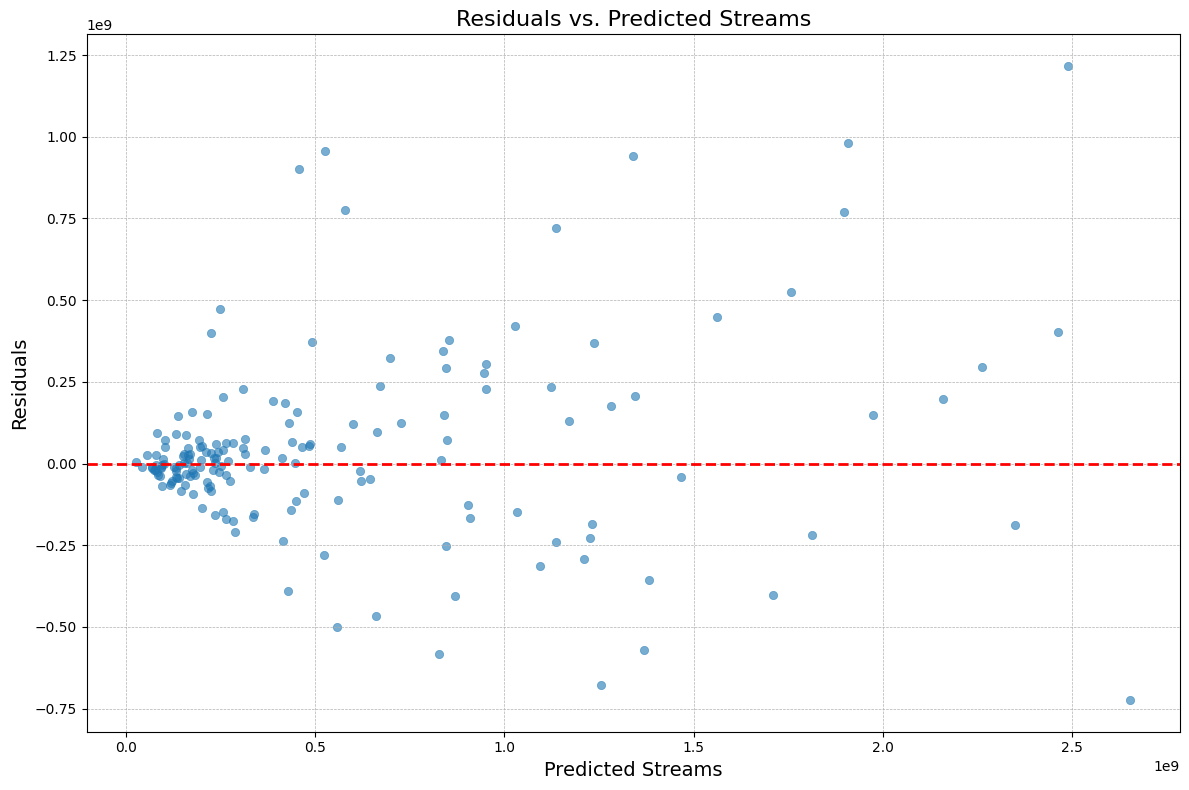

In [ ]:
residuals = y_test - y_val_pred
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_val_pred, y=residuals, alpha=0.6, edgecolor=None)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Streams', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs. Predicted Streams', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

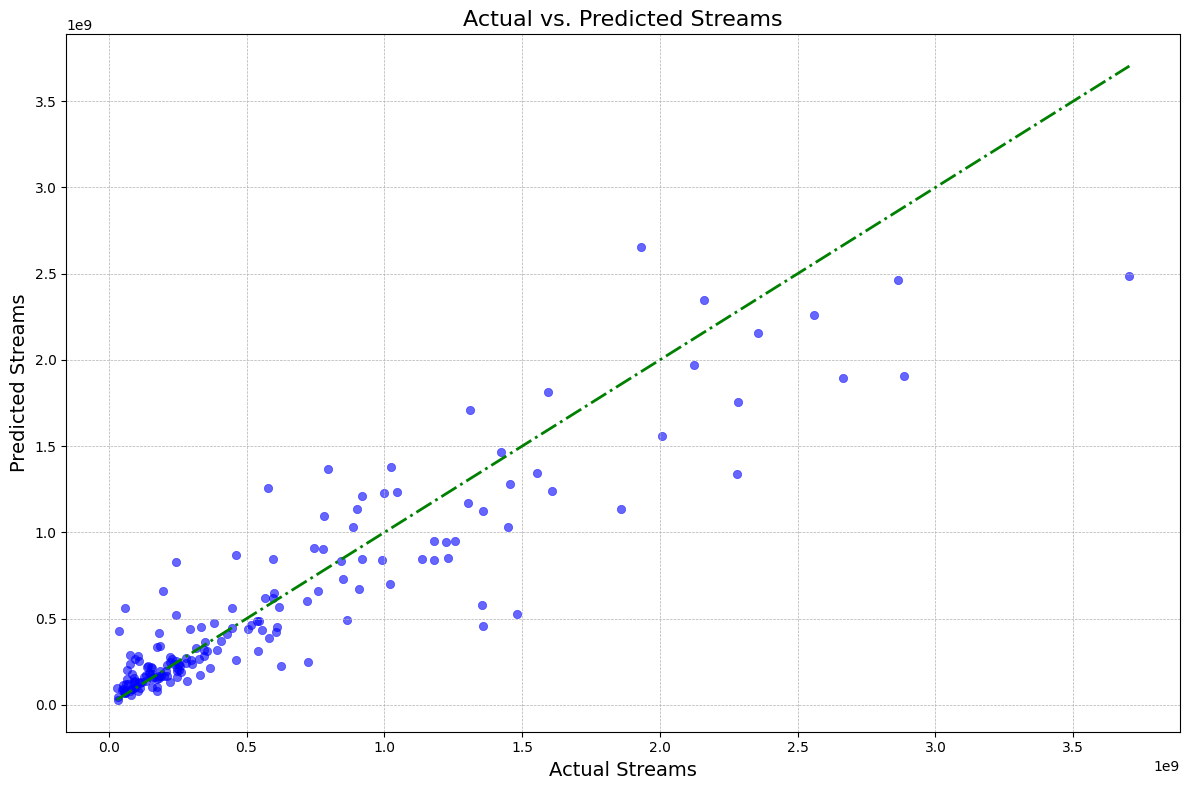

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_val_pred, alpha=0.6, edgecolor=None, color='blue')  
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='-.', lw=2)  
plt.xlabel('Actual Streams', fontsize=14)
plt.ylabel('Predicted Streams', fontsize=14)
plt.title('Actual vs. Predicted Streams', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d95935a3-2da0-4a08-a04d-6ba7c857a4f3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>